In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import pipeline, AutoModelForSequenceClassification, AutoTokenizer

In [2]:
df = pd.read_csv('/content/drive/MyDrive/data/top_attractions_NT.csv')
df.head()

,title,rating,travelDate,publishedDate,text,url,user/contributions/helpfulVotes,user/contributions/totalContributions,user/userLocation/name,user/userLocation/shortName,...,placeInfo/addressObj/street2,placeInfo/locationString,placeInfo/name,placeInfo/numberOfReviews,placeInfo/rating,placeInfo/ratingHistogram/count1,placeInfo/ratingHistogram/count2,placeInfo/ratingHistogram/count3,placeInfo/ratingHistogram/count4,placeInfo/ratingHistogram/count5
0,Needs TLC,3,2025-08,6/9/2025,Think this was once a great place to visit Now...,https://www.tripadvisor.com/ShowUserReviews-g2...,47,39,"Adelaide, Australia",Adelaide,...,Corner of Mitchell & Peel Streets,"Darwin, Top End, Northern Territory",Crocosaurus Cove,3476,4.3,102,109,336,1118,1811
1,Great Day out,5,2025-08,8/8/2025,What a great day. We thoroughly enjoyed the e...,https://www.tripadvisor.com/ShowUserReviews-g2...,3,102,"Albany, Australia",Albany,...,Corner of Mitchell & Peel Streets,"Darwin, Top End, Northern Territory",Crocosaurus Cove,3476,4.3,102,109,336,1118,1811
2,Crocosaurus Cove Darwin,5,2025-06,28/7/2025,If you want an exciting day out in Darwin defi...,https://www.tripadvisor.com/ShowUserReviews-g2...,3,18,"Penrith, Australia",Penrith,...,Corner of Mitchell & Peel Streets,"Darwin, Top End, Northern Territory",Crocosaurus Cove,3476,4.3,102,109,336,1118,1811
3,Great experience,5,2025-06,21/7/2025,The bucketlist experience lived up to the high...,https://www.tripadvisor.com/ShowUserReviews-g2...,32,39,"Dublin, Ireland",Dublin,...,Corner of Mitchell & Peel Streets,"Darwin, Top End, Northern Territory",Crocosaurus Cove,3476,4.3,102,109,336,1118,1811
4,So much fun,5,2025-07,21/7/2025,A great experience - staff were fantastic and ...,https://www.tripadvisor.com/ShowUserReviews-g2...,0,1,NaN,NaN,...,Corner of Mitchell & Peel Streets,"Darwin, Top End, Northern Territory",Crocosaurus Cove,3476,4.3,102,109,336,1118,1811


In [3]:
df.columns

Index(['title', 'rating', 'travelDate', 'publishedDate', 'text', 'url',
       'user/contributions/helpfulVotes',
       'user/contributions/totalContributions', 'user/userLocation/name',
       'user/userLocation/shortName', 'placeInfo/addressObj/city',
       'placeInfo/addressObj/country', 'placeInfo/addressObj/postalcode',
       'placeInfo/addressObj/state', 'placeInfo/addressObj/street1',
       'placeInfo/addressObj/street2', 'placeInfo/locationString',
       'placeInfo/name', 'placeInfo/numberOfReviews', 'placeInfo/rating',
       'placeInfo/ratingHistogram/count1', 'placeInfo/ratingHistogram/count2',
       'placeInfo/ratingHistogram/count3', 'placeInfo/ratingHistogram/count4',
       'placeInfo/ratingHistogram/count5'],
      dtype='object')

In [4]:
# Check which columns might contain review text for emotion classification
text_cols = [col for col in df.columns if "text" in col.lower() or "review" in col.lower() or "content" in col.lower()]
text_cols[:20], len(text_cols)

(['text', 'placeInfo/numberOfReviews'], 2)

In [5]:
df['text'].head(10)

,text
0,Think this was once a great place to visit Now...
1,What a great day. We thoroughly enjoyed the e...
2,If you want an exciting day out in Darwin defi...
3,The bucketlist experience lived up to the high...
4,A great experience - staff were fantastic and ...
5,We did the croc experience. It was fantastic a...
6,"Outstanding attraction, the staff on the Cage ..."
7,Lots of fun. I bought this experience for my 1...
8,The whole family loved it. Staff was amazing. ...
9,Probably worth a visit but not fantastic. Feel...


In [6]:
# Load the GoEmotions model
model_name = "joeddav/distilbert-base-uncased-go-emotions-student"
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Number of classes
num_labels = model.config.num_labels
print("Number of emotion classes:", num_labels)

# Label mapping (index -> emotion)
id2label = model.config.id2label
print(id2label)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

Number of emotion classes: 28
{0: 'admiration', 1: 'amusement', 2: 'anger', 3: 'annoyance', 4: 'approval', 5: 'caring', 6: 'confusion', 7: 'curiosity', 8: 'desire', 9: 'disappointment', 10: 'disapproval', 11: 'disgust', 12: 'embarrassment', 13: 'excitement', 14: 'fear', 15: 'gratitude', 16: 'grief', 17: 'joy', 18: 'love', 19: 'nervousness', 20: 'optimism', 21: 'pride', 22: 'realization', 23: 'relief', 24: 'remorse', 25: 'sadness', 26: 'surprise', 27: 'neutral'}


In [7]:
import torch
print("CUDA available?", torch.cuda.is_available())
print("GPU name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU only")

CUDA available? True
GPU name: Tesla T4


In [8]:
# Load Hugging Face GoEmotions pipeline
emotion_classifier = pipeline(
    "text-classification",
    model="joeddav/distilbert-base-uncased-go-emotions-student",
    top_k=None,
    device=0
)

tokenizer_config.json:   0%|          | 0.00/421 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


In [9]:
# Run classification for all reviews
all_reviews = df['text'].dropna().tolist()
results = emotion_classifier(all_reviews, truncation=True)

# Organize results
emotion_outputs = []
for review, res in zip(all_reviews, results):
    sorted_res = sorted(res, key=lambda x: x['score'], reverse=True)
    top_emotion = sorted_res[0]
    emotion_outputs.append({
        "top_emotion": top_emotion['label'],
        "confidence": round(top_emotion['score'], 3)
    })

# Add back to DataFrame
df.loc[df['text'].notna(), 'top_emotion'] = [eo['top_emotion'] for eo in emotion_outputs]
df.loc[df['text'].notna(), 'confidence'] = [eo['confidence'] for eo in emotion_outputs]

In [10]:
df[['text', 'top_emotion', 'confidence']].head(10)

,text,top_emotion,confidence
0,Think this was once a great place to visit Now...,caring,0.140
1,What a great day. We thoroughly enjoyed the e...,joy,0.123
2,If you want an exciting day out in Darwin defi...,excitement,0.201
3,The bucketlist experience lived up to the high...,approval,0.089
4,A great experience - staff were fantastic and ...,gratitude,0.242
5,We did the croc experience. It was fantastic a...,excitement,0.111
6,"Outstanding attraction, the staff on the Cage ...",caring,0.163
7,Lots of fun. I bought this experience for my 1...,excitement,0.120
8,The whole family loved it. Staff was amazing. ...,caring,0.126
9,Probably worth a visit but not fantastic. Feel...,sadness,0.108


In [11]:
from collections import defaultdict

# Define mapping (GoEmotions → 7 core)
emotion_mapping = {
    "joy": ["amusement", "excitement", "joy", "love", "desire", "optimism", "relief", "pride", "admiration", "approval", "caring", "gratitude"],
    "anger": ["anger", "annoyance", "disapproval"],
    "sadness": ["disappointment", "embarrassment", "grief", "remorse", "sadness"],
    "fear": ["fear", "nervousness"],
    "surprise": ["realization", "surprise", "curiosity", "confusion"],
    "disgust": ["disgust"],
    "neutral": ["neutral"]
}

# Invert mapping for quick lookup
fine_to_core = {fine: core for core, fine_list in emotion_mapping.items() for fine in fine_list}

collapsed_outputs = []
for review, res in zip(all_reviews, results):
    # Aggregate scores into 7 groups
    group_scores = defaultdict(float)
    for r in res:
        fine_label = r['label']
        score = r['score']
        if fine_label in fine_to_core:
            core_label = fine_to_core[fine_label]
            group_scores[core_label] += score

    # Pick top group
    top_group = max(group_scores.items(), key=lambda x: x[1])

    collapsed_outputs.append({
        "review_preview": review[:80] + ("..." if len(review) > 80 else ""),
        "collapsed_emotion": top_group[0],
        "confidence": round(top_group[1], 3),
    })

collapsed_df = pd.DataFrame(collapsed_outputs)

In [12]:
# Get the indices of reviews we classified
valid_idx = df['text'].dropna().index

# Add new columns
df.loc[valid_idx, 'core_emotion'] = collapsed_df['collapsed_emotion'].values
df.loc[valid_idx, 'core_confidence'] = collapsed_df['confidence'].values

In [13]:
df[['text', 'core_emotion', 'core_confidence']].head(10)

,text,core_emotion,core_confidence
0,Think this was once a great place to visit Now...,joy,0.542
1,What a great day. We thoroughly enjoyed the e...,joy,0.742
2,If you want an exciting day out in Darwin defi...,joy,0.708
3,The bucketlist experience lived up to the high...,joy,0.464
4,A great experience - staff were fantastic and ...,joy,0.868
5,We did the croc experience. It was fantastic a...,joy,0.708
6,"Outstanding attraction, the staff on the Cage ...",joy,0.676
7,Lots of fun. I bought this experience for my 1...,joy,0.645
8,The whole family loved it. Staff was amazing. ...,joy,0.746
9,Probably worth a visit but not fantastic. Feel...,joy,0.331


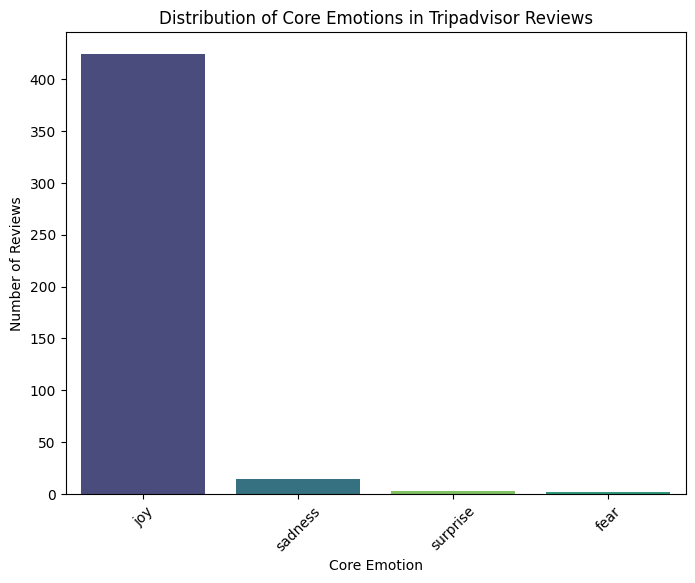

In [29]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='core_emotion', order=df['core_emotion'].value_counts().index, palette="viridis", hue='core_emotion', legend=False)

plt.title("Distribution of Core Emotions in Tripadvisor Reviews")
plt.xlabel("Core Emotion")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.show()

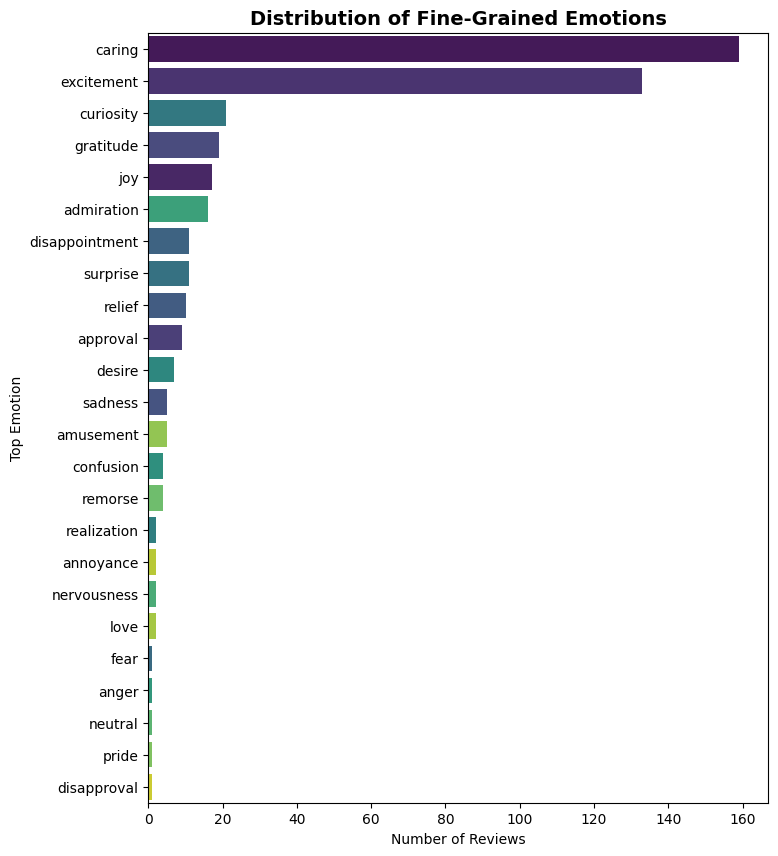

In [30]:
plt.figure(figsize=(8,10))
sns.countplot(
    data=df,
    y="top_emotion",
    order=df['top_emotion'].value_counts().index,
    palette="viridis",
    hue="top_emotion",
    legend=False
)

plt.title("Distribution of Fine-Grained Emotions", fontsize=14, weight="bold")
plt.xlabel("Number of Reviews")
plt.ylabel("Top Emotion")
plt.show()